In [12]:
from data_utils import DataLoader
from spectral_mix import SpectralMix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
dl = DataLoader()

test_params = [
    {
        'dataset_name': 'acm',
        'd': 9,
        'k': 3
    },
    {
        'dataset_name': 'dblp',
        'd': 2,
        'k': 3
    },
    {
        'dataset_name': 'flickr',
        'd': 11,
        'k': 7
    },
    {
        'dataset_name': 'imdb',
        'd': 2,
        'k': 3
    }
]

for test_case in test_params:
    dataset_name = test_case['dataset_name']
    k = test_case['k']
    d = test_case['d']
    dataset = dl.load_dataset(dataset_name)

    print(f'=== Starting First Test {dataset_name} ===')
    for dim in [2, d]:
        print(f'    Dim: {dim}')
        sm = SpectralMix(adjacency_matrix=dataset['adjacency_matrix'], attribute_matrix=dataset['attribute_matrix'], d=dim, k=k)
        sm = sm.fit(run_clustering=True)

        labels = sm.labels_
        o = sm.o

        np.save(f'clusterings/o_{dataset_name}_{dim}.npy', o)
        np.save(f'clusterings/labels_{dataset_name}_{dim}.npy', labels)

=== Starting First Test acm ===
    Dim: 2


100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


    Dim: 9


100%|██████████| 50/50 [01:25<00:00,  1.71s/it]


=== Starting First Test dblp ===
    Dim: 2


100%|██████████| 50/50 [01:46<00:00,  2.14s/it]


    Dim: 2


100%|██████████| 50/50 [01:49<00:00,  2.18s/it]


=== Starting First Test flickr ===
    Dim: 2


100%|██████████| 50/50 [01:20<00:00,  1.62s/it]


    Dim: 11


100%|██████████| 50/50 [07:45<00:00,  9.32s/it]


=== Starting First Test imdb ===
    Dim: 2


100%|██████████| 50/50 [00:24<00:00,  2.00it/s]


    Dim: 2


100%|██████████| 50/50 [00:24<00:00,  2.01it/s]


In [16]:
def plot_scatter(data, labels, dataset_name, subtitle, dim):
    _, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(data[:, 0], data[:, 1], c=labels)
    
    ax.grid()
    ax.set_title(f'Node Embedding Computed by SpectralMix for Dataset {dataset_name}\n{subtitle}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.savefig(f'plots/scatterplots/{dataset_name}_clustering_d{dim}.png')
    plt.show()

=== Plotting First Test acm ===
    Dim: 2


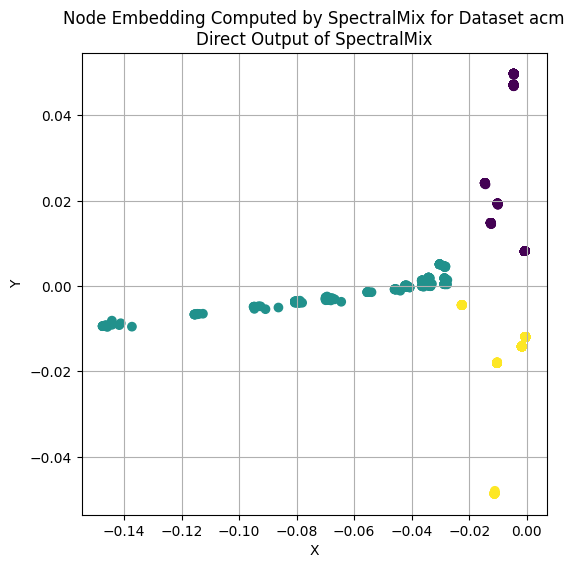

    Dim: 9


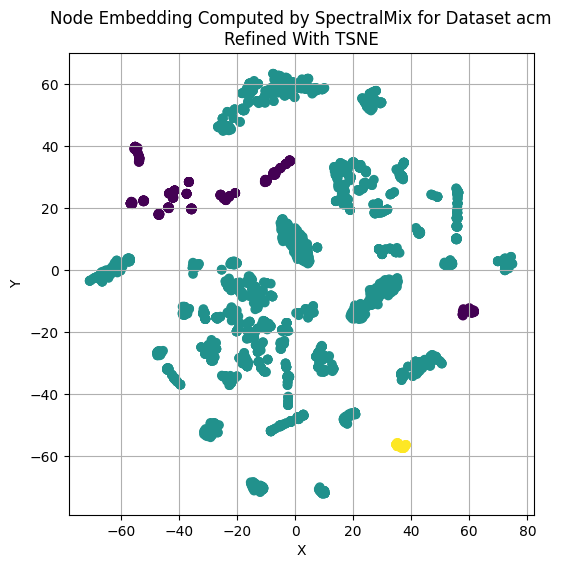

=== Plotting First Test dblp ===
    Dim: 2


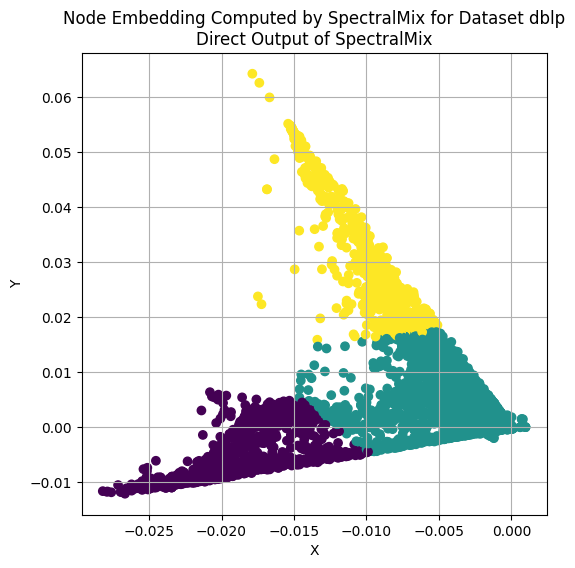

    Dim: 2


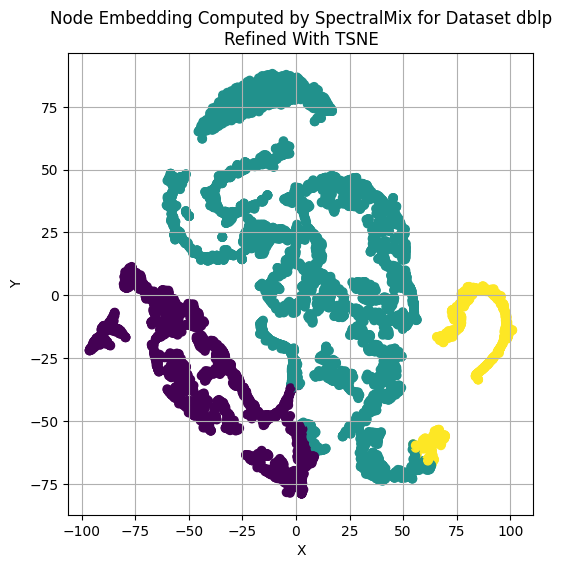

=== Plotting First Test flickr ===
    Dim: 2


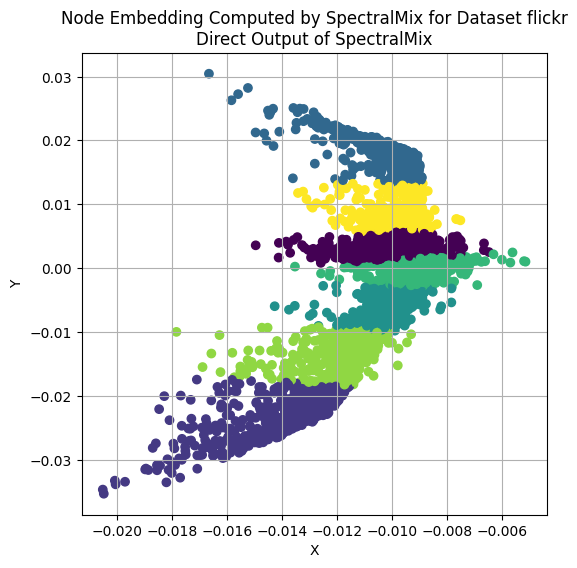

    Dim: 11


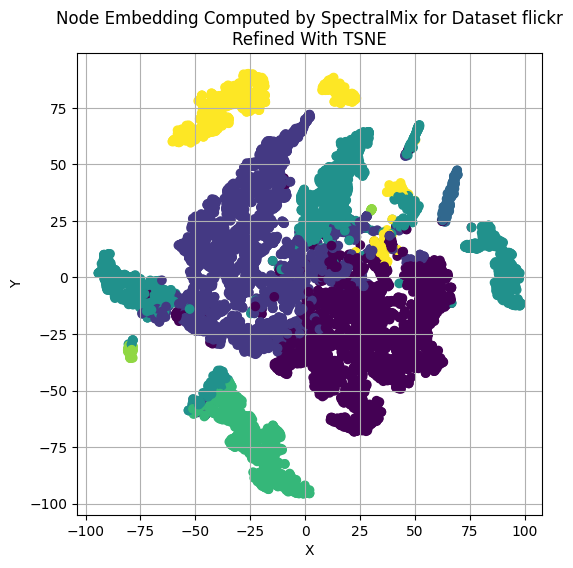

=== Plotting First Test imdb ===
    Dim: 2


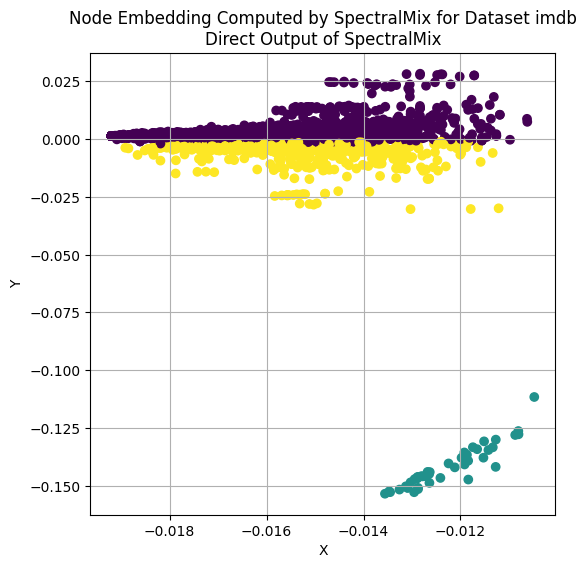

    Dim: 2


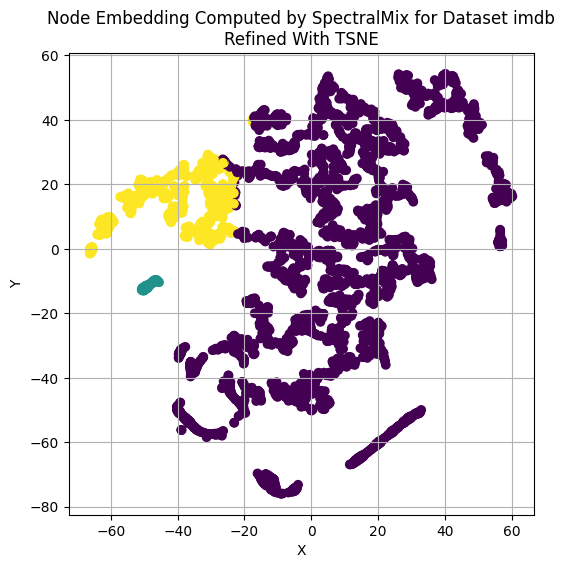

In [17]:
for test_case in test_params:
    dataset_name = test_case['dataset_name']
    d = test_case['d']

    print(f'=== Plotting First Test {dataset_name} ===')
    for i, dim in enumerate([2, d]):
        print(f'    Dim: {dim}')
        o = np.load(f'clusterings/o_{dataset_name}_{dim}.npy')
        labels = np.load(f'clusterings/labels_{dataset_name}_{dim}.npy')

        if i == 1:
            o = TSNE(n_components=2).fit_transform(o)

        subtitle = 'Refined With TSNE'
        if i == 0:
            subtitle = 'Direct Output of SpectralMix'

        plot_scatter(o, labels, dataset_name, subtitle, dim)